In [63]:
import os
import json
from pydub import AudioSegment

# === Step 1: Set folders ===
input_folder = r"Desktop/Respiratory dataset/Spr_dataset/40069321_15.3_0_p1_981.json"
wav_folder = r"D:\spr_dataset\audio_files"
output_folder = "output_events"
os.makedirs(output_folder, exist_ok=True)

# === Step 2: Loop through all JSON files ===
for file_name in os.listdir(input_folder):
    if file_name.endswith(".json"):
        file_path = os.path.join(input_folder, file_name)
        base_name = os.path.splitext(file_name)[0]  # '40069321_15.3_0_p1_981'
        wav_name = base_name + ".wav"
        wav_path = os.path.join(wav_folder, wav_name)

        # Check if corresponding .wav exists
        if not os.path.exists(wav_path):
            print(f"⚠️ WAV not found for {file_name}, skipping...")
            continue

        # Load the .wav file
        try:
            audio = AudioSegment.from_wav(wav_path)
        except Exception as e:
            print(f"❌ Error loading WAV {wav_path}: {e}")
            continue

        # Load the JSON file
        with open(file_path, "r") as f:
            data = json.load(f)

        events = data.get("event_annotation", [])

        # === Step 3: Process each event ===
        for i, event in enumerate(events):
            label = event["label"]
            start = float(event["start_time"])
            end = float(event["end_time"])

            # Prepare event dictionary
            event_data = {
                "file": wav_name,
                "label": label,
                "start_time": start,
                "end_time": end
            }

            # === Save JSON file ===
            event_json_name = f"{label}_{base_name}_{i+1}.json"
            json_output_path = os.path.join(output_folder, event_json_name)

            with open(json_output_path, "w") as jf:
                json.dump(event_data, jf, indent=4)

            # === Save sliced audio file ===
            start_ms = int(start * 1000)
            end_ms = int(end * 1000)
            audio_slice = audio[start_ms:end_ms]

            wav_output_path = os.path.join(output_folder, f"{label}_{base_name}_{i+1}.wav")
            audio_slice.export(wav_output_path, format="wav")

            print(f"✅ Saved: {event_json_name} and corresponding .wav")

print("\n🎉 All events processed successfully.")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'Desktop/Respiratory dataset/Spr_dataset/40069321_15.3_0_p1_981.json'

In [3]:
!pip install ipykernel

In [65]:
!python -m ipykernel install --user --name=venv-kernel --display-name "Python (.venv)"


Installed kernelspec venv-kernel in C:\Users\asus\AppData\Roaming\jupyter\kernels\venv-kernel


0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.


In [67]:
from pydub import AudioSegment
print("✅ pydub is working!")


✅ pydub is working!


In [69]:
!pip install pydub

In [71]:
from pydub import AudioSegment
print("✅ pydub is working!")

✅ pydub is working!


In [11]:
import sys
print(sys.executable)


C:\Users\asus\anaconda3\python.exe


In [73]:
import os
import json
from pydub import AudioSegment

# === Step 1: Set folders ===
input_folder = "train_classification_json/"
wav_folder = "train_classification_wav"
output_folder = "output_events"
os.makedirs(output_folder, exist_ok=True)

# === Step 2: Loop through all JSON files ===
for file_name in os.listdir(input_folder):
    if file_name.endswith(".json"):
        file_path = os.path.join(input_folder, file_name)
        base_name = os.path.splitext(file_name)[0]  # example: '40069321_15.3_0_p1_981'
        wav_name = base_name + ".wav"
        wav_path = os.path.join(wav_folder, wav_name)

        # Check if corresponding .wav exists
        if not os.path.exists(wav_path):
            print(f"⚠️ WAV not found for {file_name}, skipping...")
            continue

        # Load the .wav file
        try:
            audio = AudioSegment.from_wav(wav_path)
        except Exception as e:
            print(f"❌ Error loading WAV {wav_path}: {e}")
            continue

        # Load the JSON file
        with open(file_path, "r") as f:
            data = json.load(f)

        events = data.get("event_annotation", [])

        # === Step 3: Process each event ===
        for i, event in enumerate(events):
            label = event["type"]
            start = float(event["start"])    # in seconds
            end = float(event["end"])        # in seconds

            # === Save sliced audio file ===
            start_ms = int(start/1000)
            end_ms = int(end/1000)
            audio_slice = audio[start_ms:end_ms]

            # Create label-based folder (optional but cleaner)
            label_folder = os.path.join(output_folder, label)
            os.makedirs(label_folder, exist_ok=True)

            wav_output_path = os.path.join(label_folder, f"{label}_{base_name}_{i+1}.wav")
            audio_slice.export(wav_output_path, format="wav")

            print(f"✅ Saved: {wav_output_path}")

print("\n🎉 All events processed and saved as .wav files only.")



✅ Saved: output_events\Normal\Normal_40138127_14.7_0_p3_139_1.wav
✅ Saved: output_events\Normal\Normal_40138127_14.7_0_p4_140_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_2.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_3.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_4.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_2.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_3.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_4.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p3_1916_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p3_1916_2.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p3_1916_3.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p4_1932_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p4_1932_2.wav
✅ Saved: o

In [77]:
import os
import json
from pydub import AudioSegment

# === Step 1: Set input/output folders ===
input_folder = "train_classification_json"
wav_folder = "train_classification_wav"
output_root = "output_events"
os.makedirs(output_root, exist_ok=True)

# === Step 2: Loop through each JSON file ===
for file_name in os.listdir(input_folder):
    if file_name.endswith(".json"):
        file_path = os.path.join(input_folder, file_name)
        base_name = os.path.splitext(file_name)[0]
        wav_name = base_name + ".wav"
        wav_path = os.path.join(wav_folder, wav_name)

        # Skip if corresponding WAV file not found
        if not os.path.exists(wav_path):
            print(f"⚠️ WAV not found for {file_name}, skipping...")
            continue

        # Load the full audio file
        try:
            audio = AudioSegment.from_wav(wav_path)
        except Exception as e:
            print(f"❌ Error loading WAV {wav_path}: {e}")
            continue

        # Load JSON content
        with open(file_path, "r") as f:
            data = json.load(f)

        events = data.get("event_annotation", [])

        # === Step 3: Process each event and save .wav ===
        for i, event in enumerate(events):
            label = event["type"].strip()  # e.g., Normal, Wheeze, etc.
            start = float(event["start"])   # in milliseconds
            end = float(event["end"])       # in milliseconds

            # Create label-specific output folder
            label_folder = os.path.join(output_root, label)
            os.makedirs(label_folder, exist_ok=True)

            # Slice the audio
            start_ms = int(start)
            end_ms = int(end)
            slice_audio = audio[start_ms:end_ms]

            # Save sliced .wav file
            wav_output_path = os.path.join(label_folder, f"{label}_{base_name}_{i+1}.wav")
            slice_audio.export(wav_output_path, format="wav")

            print(f"✅ Saved: {wav_output_path}")

print("\n🎉 All sound types (.wav) saved in their respective folders successfully!")


✅ Saved: output_events\Normal\Normal_40138127_14.7_0_p3_139_1.wav
✅ Saved: output_events\Normal\Normal_40138127_14.7_0_p4_140_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_2.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_3.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p1_1884_4.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_2.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_3.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p2_1900_4.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p3_1916_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p3_1916_2.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p3_1916_3.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p4_1932_1.wav
✅ Saved: output_events\Normal\Normal_40490865_8.4_1_p4_1932_2.wav
✅ Saved: o

In [74]:
start_ms = int(start)
end_ms = int(end)

In [75]:
start_ms = int(start * 1000)
end_ms = int(end * 1000)


In [76]:
import os
import json
from pydub import AudioSegment
json_path = "train_classification_json/40069321_15.3_0_p4_984.json"
audio_path = "train_classification_wav/40069321_15.3_0_p4_984.wav"
output_folder = "output_events"
sampling_rate = 4000  
audio = AudioSegment.from_wav(audio_path)
base_name = os.path.splitext(os.path.basename(audio_path))[0]
with open(json_path, "r") as f:
    data = json.load(f)

events = data["event_annotation"]

# ----- PROCESS EVENTS -----
for i, event in enumerate(events):
    label = event["type"]
    start_sample = float(event["start"])
    end_sample = float(event["end"])

    # Convert sample to seconds → milliseconds
    start_ms = int((start_sample / sampling_rate) * 1000)
    end_ms = int((end_sample / sampling_rate) * 1000)

    # Validate duration
    if end_ms <= start_ms:
        print(f"⚠️ Skipped invalid duration: event {i+1}")
        continue

    # Slice audio
    audio_slice = audio[start_ms:end_ms]

    # Create label folder
    label_folder = os.path.join(output_folder, label)
    os.makedirs(label_folder, exist_ok=True)

    # Save sliced audio
    wav_output_path = os.path.join(label_folder, f"{label}_{base_name}_{i+1}.wav")
    audio_slice.export(wav_output_path, format="wav")

    print(f"✅ Saved: {wav_output_path}")

print("\n🎉 All sound types (.wav) saved in their respective folders successfully!")



🎉 All sound types (.wav) saved in their respective folders successfully!


In [82]:
print(audio.duration_seconds)

15.36


In [85]:
import os
import librosa

# Path to the parent dataset folder
dataset_path = "output_events/Coarse Crackle"

# Lists to store data
X = []  # Audio signals
Y = []  # Labels

# Loop through each class folder
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)

    if os.path.isdir(class_path):
        # Loop through each file in the class folder
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            try:
                # Load the audio file
                signal, sr = librosa.load(file_path, sr=None)  # sr=None to keep original sampling rate
                X.append(signal)
                Y.append(label)
                print(f"Loaded {file_name} from class {label}, signal length: {len(signal)}")

            except Exception as e:
                print(f"Error loading {file_path}: {e}")

# Optional: Convert to NumPy arrays if needed
import numpy as np
X = np.array(X, dtype=object)  # Keep variable-length sequences
Y = np.array(Y)

# Output sample
print(f"\nTotal samples: {len(X)}")
print(f"First signal shape: {X[0].shape if len(X) > 0 else 'N/A'}")
print(f"First label: {Y[0] if len(Y) > 0 else 'N/A'}")



Total samples: 0
First signal shape: N/A
First label: N/A


In [16]:
!pip install librosa

In [87]:
import os
import librosa

# Path to the parent dataset folder
dataset_path = "output_events/Fine Crackle"

# Lists to store data
X = []  # Audio signals
Y = []  # Labels

# Loop through each class folder
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)

    if os.path.isdir(class_path):
        # Loop through each file in the class folder
        for file_name in os.listdir(class_path):
            file_path = os.path.join(class_path, file_name)

            try:
                # Load the audio file
                signal, sr = librosa.load(file_path, sr=None)  # sr=None to keep original sampling rate
                X.append(signal)
                Y.append(label)
                print(f"Loaded {file_name} from class {label}, signal length: {len(signal)}")

            except Exception as e:
                print(f"Error loading {file_path}: {e}")

# Optional: Convert to NumPy arrays if needed
import numpy as np
X = np.array(X, dtype=object)  # Keep variable-length sequences
Y = np.array(Y)

# Output sample
print(f"\nTotal samples: {len(X)}")
print(f"First signal shape: {X[0].shape if len(X) > 0 else 'N/A'}")
print(f"First label: {Y[0] if len(Y) > 0 else 'N/A'}")



Total samples: 0
First signal shape: N/A
First label: N/A


In [89]:
!pip install librosa

In [91]:
# Step 2: Import libraries
import os
import librosa
import numpy as np


In [93]:
dataset_path = "output_events"
target_sr = 2000  
X = [] 
y = [] 


In [95]:
# Step 4: Read all files
for label in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, label)
    
    if os.path.isdir(class_path):
        for file in os.listdir(class_path):
            file_path = os.path.join(class_path, file)
            
            try:
                # Load and resample to 2kHz
                signal, sr = librosa.load(file_path, sr=None)
                signal_resampled = librosa.resample(signal, orig_sr=sr, target_sr=target_sr)
                
                X.append(signal_resampled)
                y.append(label)
                
                print(f"✅ Loaded: {file} | Label: {label} | Original SR: {sr} | Resampled length: {len(signal_resampled)}")
                
            except Exception as e:
                print(f"❌ Error loading {file_path}: {e}")


C:\Users\asus\anaconda3\Lib\site-packages\paramiko\pkey.py:82: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "cipher": algorithms.TripleDES,
C:\Users\asus\anaconda3\Lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.Blowfish and will be removed from this module in 45.0.0.
  "class": algorithms.Blowfish,
C:\Users\asus\anaconda3\Lib\site-packages\paramiko\transport.py:243: CryptographyDeprecationWarning: TripleDES has been moved to cryptography.hazmat.decrepit.ciphers.algorithms.TripleDES and will be removed from this module in 48.0.0.
  "class": algorithms.TripleDES,


✅ Loaded: Coarse Crackle_40797382_4.8_0_p3_3441_5.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 1914
✅ Loaded: Coarse Crackle_41004529_5.2_1_p1_1408_5.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 1110
✅ Loaded: Coarse Crackle_41161556_1.7_0_p2_3099_5.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 1910
✅ Loaded: Coarse Crackle_41161556_1.7_0_p3_2154_5.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 1912
✅ Loaded: Coarse Crackle_41190734_9.5_0_p1_1217_2.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 2532
✅ Loaded: Coarse Crackle_41251473_2.7_1_p1_2156_1.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 3176
✅ Loaded: Coarse Crackle_41251473_2.7_1_p1_2156_2.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 3428
✅ Loaded: Coarse Crackle_41251473_2.7_1_p1_2156_3.wav | Label: Coarse Crackle | Original SR: 8000 | Resampled length: 2670
✅ Loaded: Coarse

In [96]:
X = np.array(X, dtype=object)
y = np.array(y)

In [97]:
print("\nSummary:")
print(f"Total Samples: {len(X)}")
print(f"First signal shape: {X[0].shape if len(X) > 0 else 'N/A'}")
print(f"First label: {y[0] if len(y) > 0 else 'N/A'}")


Summary:
Total Samples: 6656
First signal shape: (1914,)
First label: Coarse Crackle


In [98]:
X[6].shape

(3428,)

In [99]:
y.shape

(6656,)

In [100]:
y

array(['Coarse Crackle', 'Coarse Crackle', 'Coarse Crackle', ...,
       'Wheeze+Crackle', 'Wheeze+Crackle', 'Wheeze+Crackle'], dtype='<U14')

In [112]:
#plot some signal
#find stft of all X
#then plot stft

In [114]:
X.shape

(6656,)

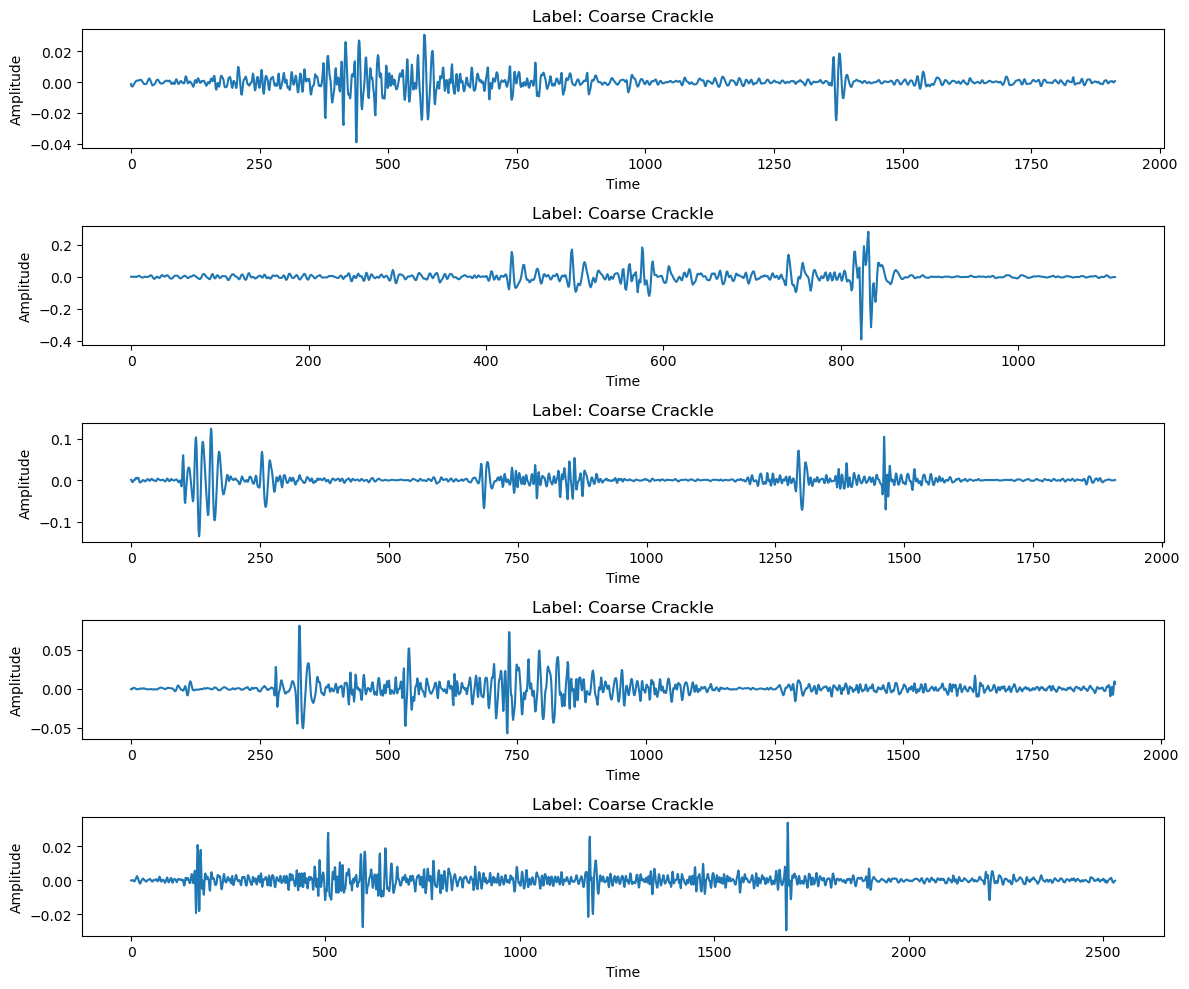

In [116]:
import matplotlib.pyplot as plt

# Number of signals to plot
num_plots = 5
plt.figure(figsize=(12, num_plots * 2))

for i in range(num_plots):
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(X[i])
    plt.title(f"Label: {y[i]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


In [118]:
#find stft of all X
from scipy.signal import stft
import numpy as np

# Parameters for STFT
fs = 4000  # Sampling frequency (change if your signals use a different fs)
nperseg = 256  # Segment length (you can tune this)

# Store STFT results
stft_data = []

for signal in X:
    # Compute STFT
    f, t, Zxx = stft(signal, fs=fs, nperseg=nperseg)
    stft_data.append(np.abs(Zxx))  # Store magnitude spectrogram

# Example: Shape of STFT result for the first signal
print("STFT shape of first signal:", stft_data[0].shape)


STFT shape of first signal: (129, 16)


C:\Users\asus\anaconda3\Lib\site-packages\scipy\signal\_spectral_py.py:1240: UserWarning: nperseg = 256 is greater than input length  = 252, using nperseg = 252
  freqs, time, Zxx = _spectral_helper(x, x, fs, window, nperseg, noverlap,


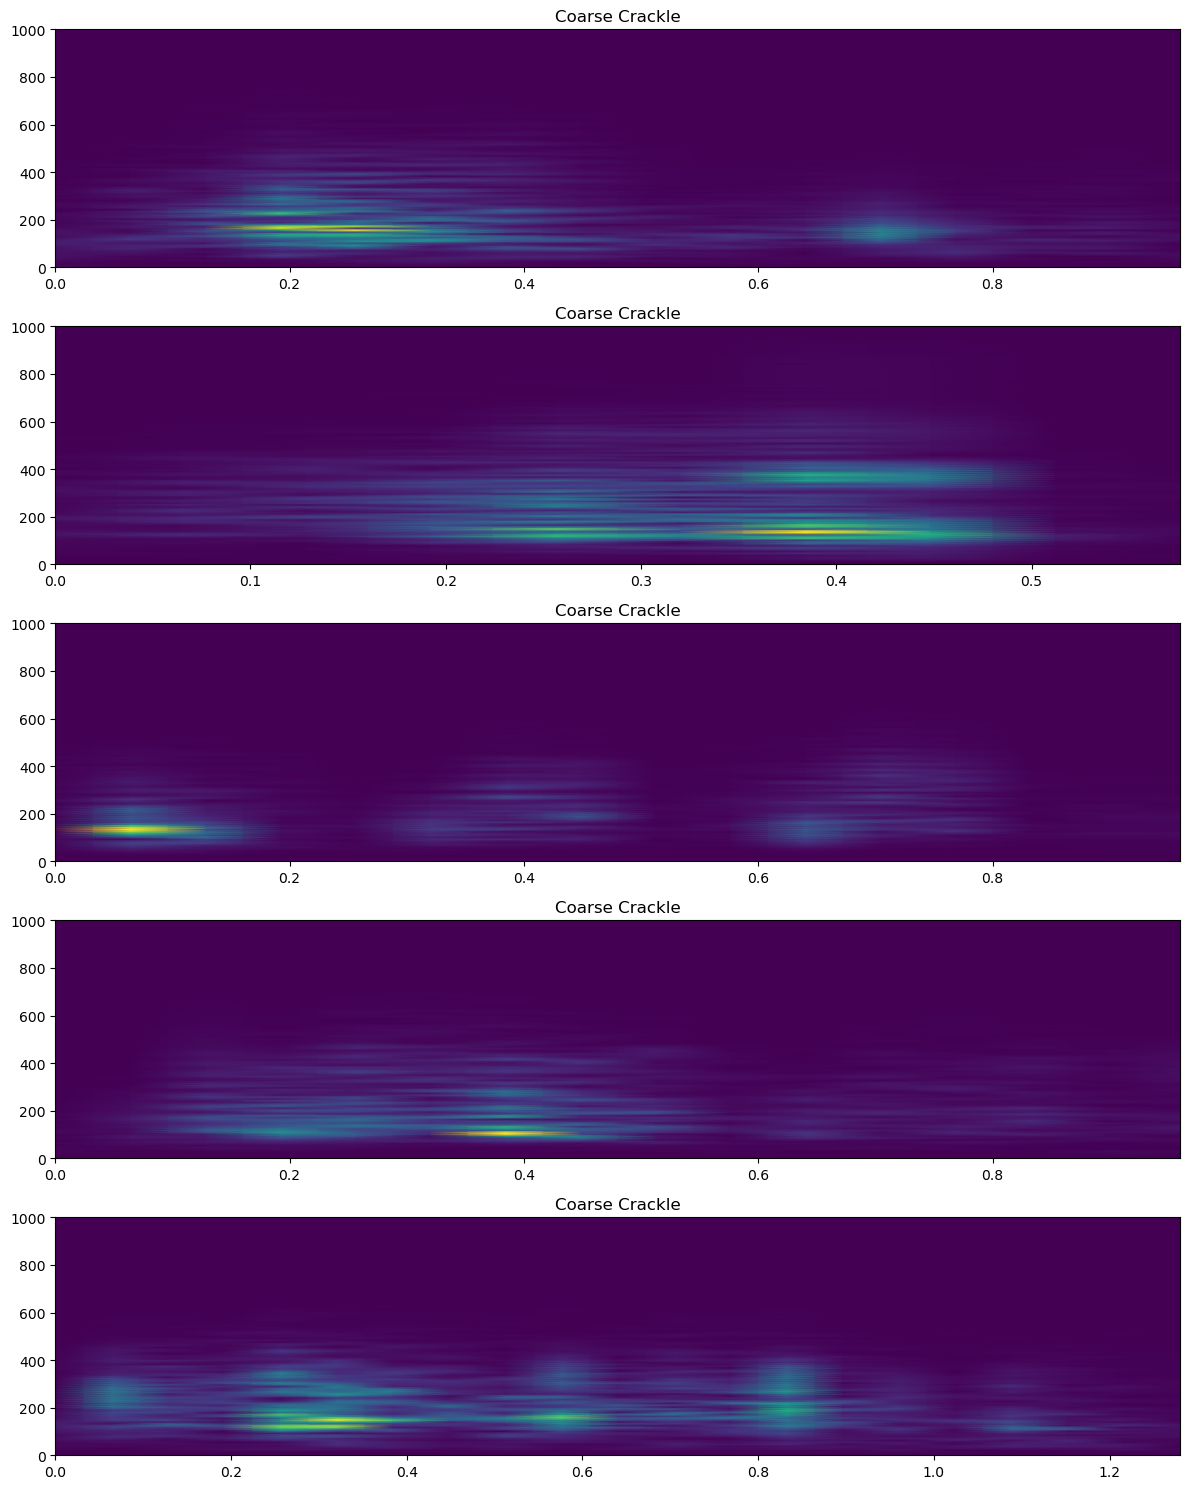

In [120]:
#then plot stft
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # How many spectrograms to plot

plt.figure(figsize=(12, num_plots * 3))

for i in range(num_plots):
    # Compute STFT
    f, t, Zxx = stft(X[i], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Plot
    plt.subplot(num_plots, 1, i + 1)
    plt.pcolormesh(t, f, magnitude, shading='gouraud')
    plt.title(f"{y[i]}")
    plt.ylabel
    plt.xlabel
    plt.colorbar

plt.tight_layout()
plt.show()


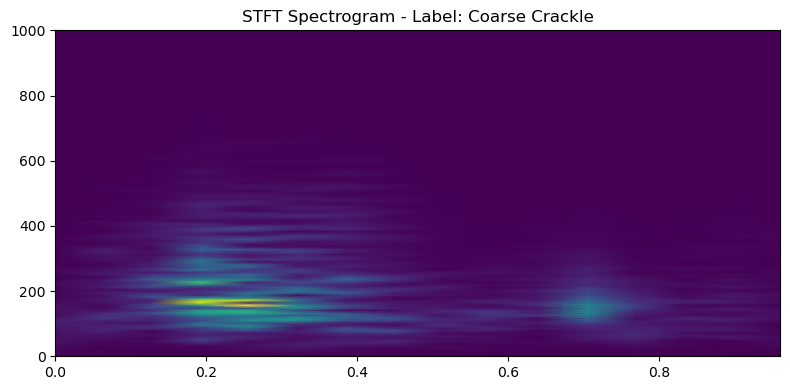

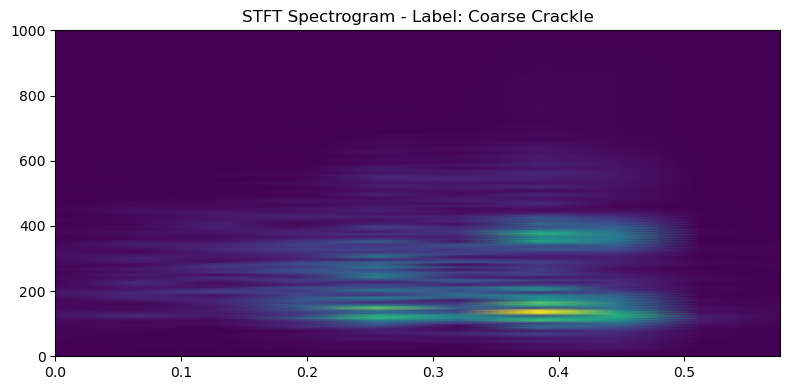

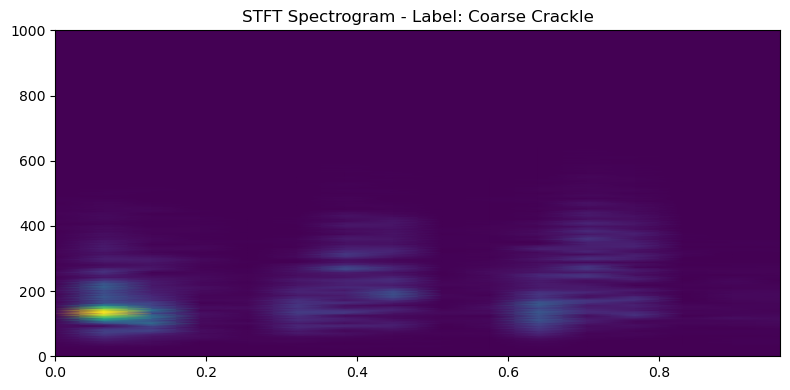

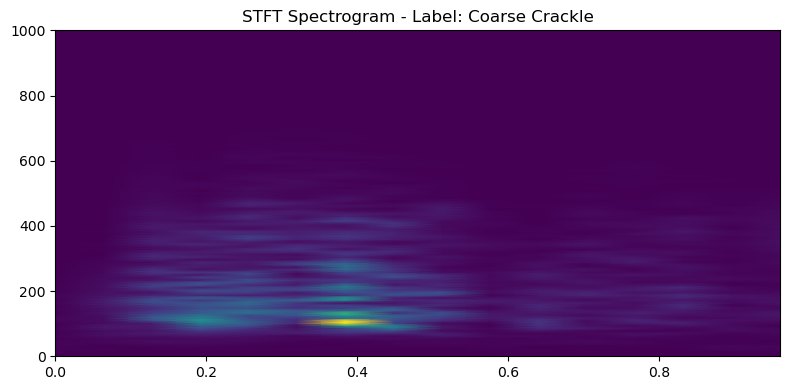

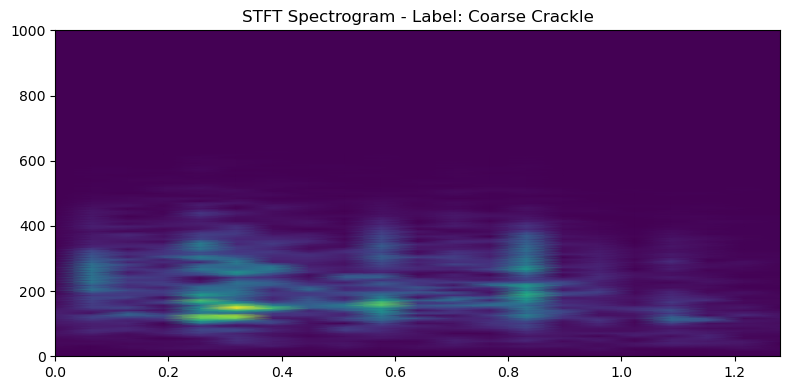

In [122]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Create output directory if not exists
output_dir = "stft_spectrograms"
os.makedirs(output_dir, exist_ok=True)

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Segment size
num_plots = 5  # Number of plots to save/show

for i in range(num_plots):
    # Compute STFT
    f, t, Zxx = stft(X[i], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Plot
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, magnitude, shading='gouraud')
    plt.title(f"STFT Spectrogram - Label: {y[i]}")
    plt.ylabel
    plt.xlabel
    plt.colorbar
    plt.tight_layout()

    # Save to file
    filename = f"{output_dir}/spectrogram_{i}_{y[i].replace('+', '_')}.png"
    plt.savefig(filename)
    plt.show()


In [124]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Create output directory
output_dir = "stft_spectrograms"
os.makedirs(output_dir, exist_ok=True)

# STFT parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Segment length
num_plots = 5  # Number of spectrograms to save

for i in range(num_plots):
    # Compute STFT
    f, t, Zxx = stft(X[i], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Plot the spectrogram with NO decorations
    plt.figure(figsize=(8, 4))
    plt.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')
    plt.axis('off')  # Turn off all axes

    # Save tightly without padding or border
    filename = f"{output_dir}/spectrogram_{i}_{y[i].replace('+', '_')}.png"
    plt.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.close()


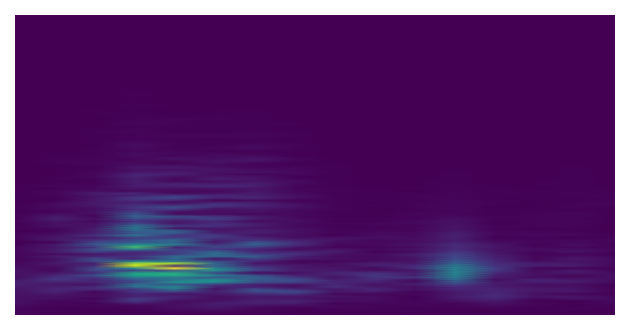

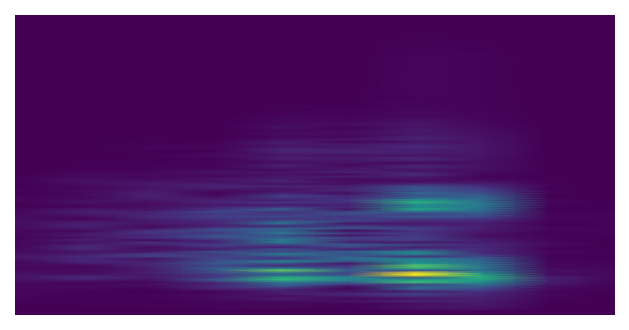

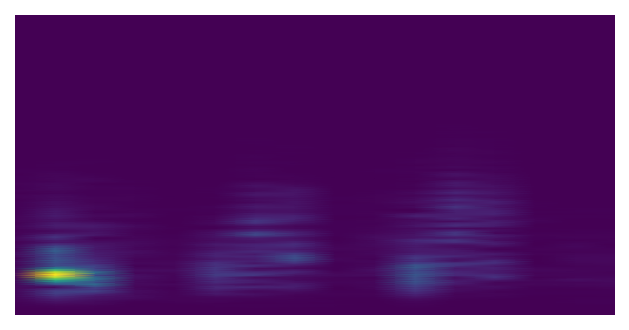

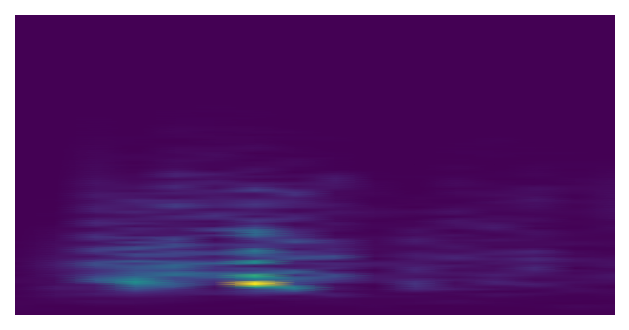

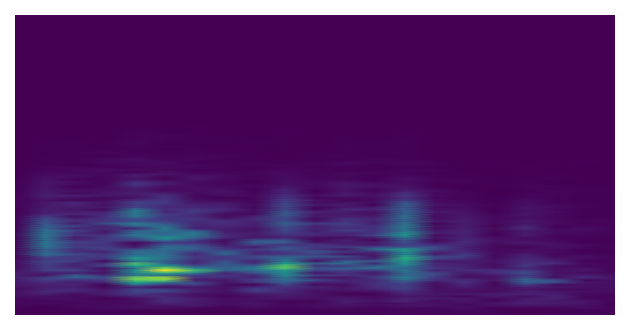

In [126]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # Number of spectrograms to process

# Optional: Folder to save images
output_dir = "clean_spectrograms"
os.makedirs(output_dir, exist_ok=True)

for i in range(num_plots):
    # Compute STFT
    f, t, Zxx = stft(X[i], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Create a clean figure without axis
    fig = plt.figure(figsize=(4, 2), dpi=150)
    ax = plt.Axes(fig, [0, 0, 1, 1])  # Fill entire figure
    ax.set_axis_off()
    fig.add_axes(ax)

    # Plot spectrogram
    ax.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')

    # Save image
    filename = f"{output_dir}/spectrogram_{i}_{y[i].replace('+', '_')}.png"
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)

    # Show in notebook
    plt.show(fig)  # <--- This will display the plot inline in Jupyter

    plt.close(fig)


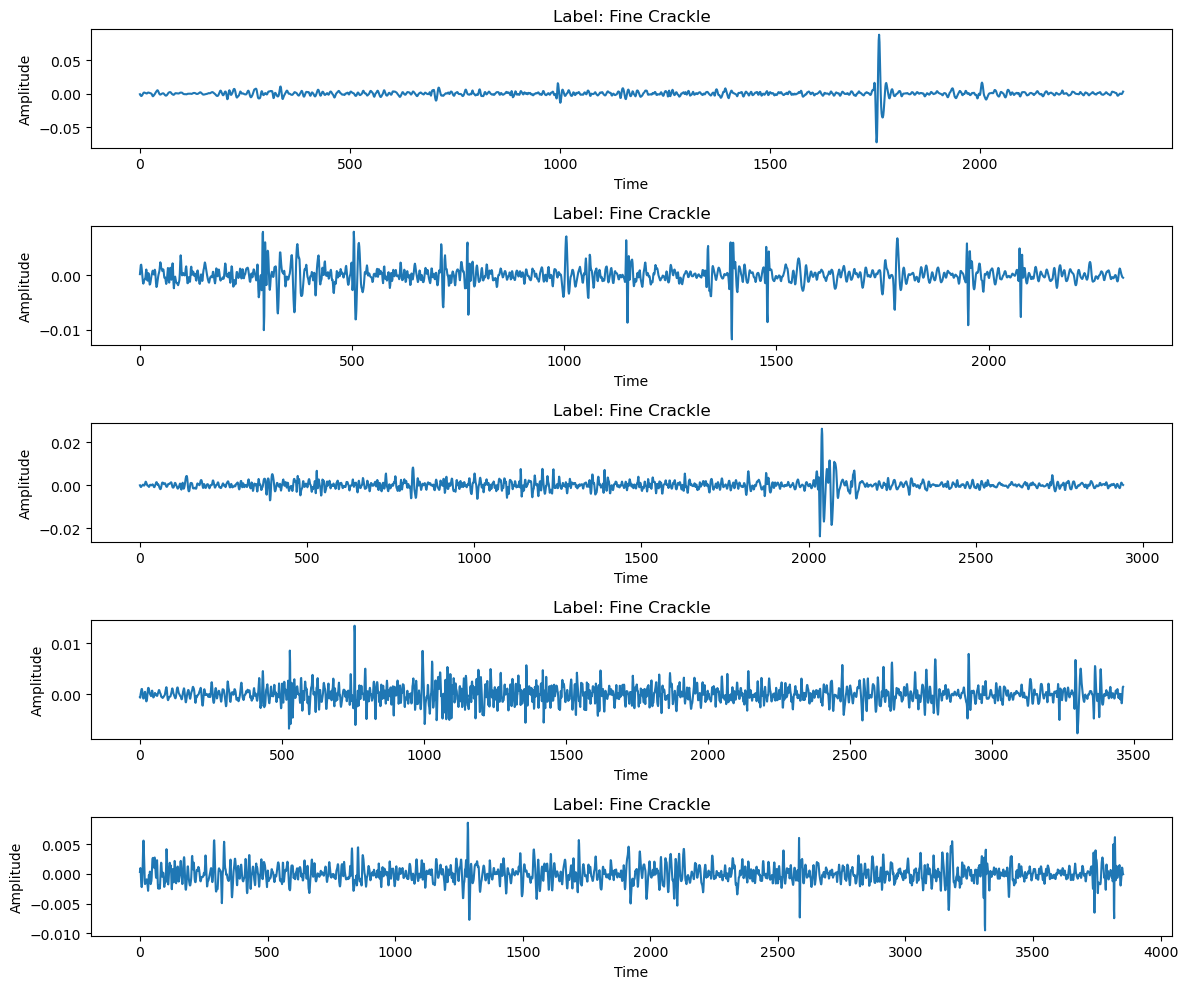

In [128]:
import matplotlib.pyplot as plt
# Filter indices for "Fine Crackle"
fine_crackle_indices = [i for i, label in enumerate(y) if label == "Fine Crackle"]

# Number of signals to plot (limit if too many)
num_plots = min(5, len(fine_crackle_indices))

plt.figure(figsize=(12, num_plots * 2))

for i in range(num_plots):
    idx = fine_crackle_indices[i]
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(X[idx])
    plt.title(f"Label: {y[idx]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

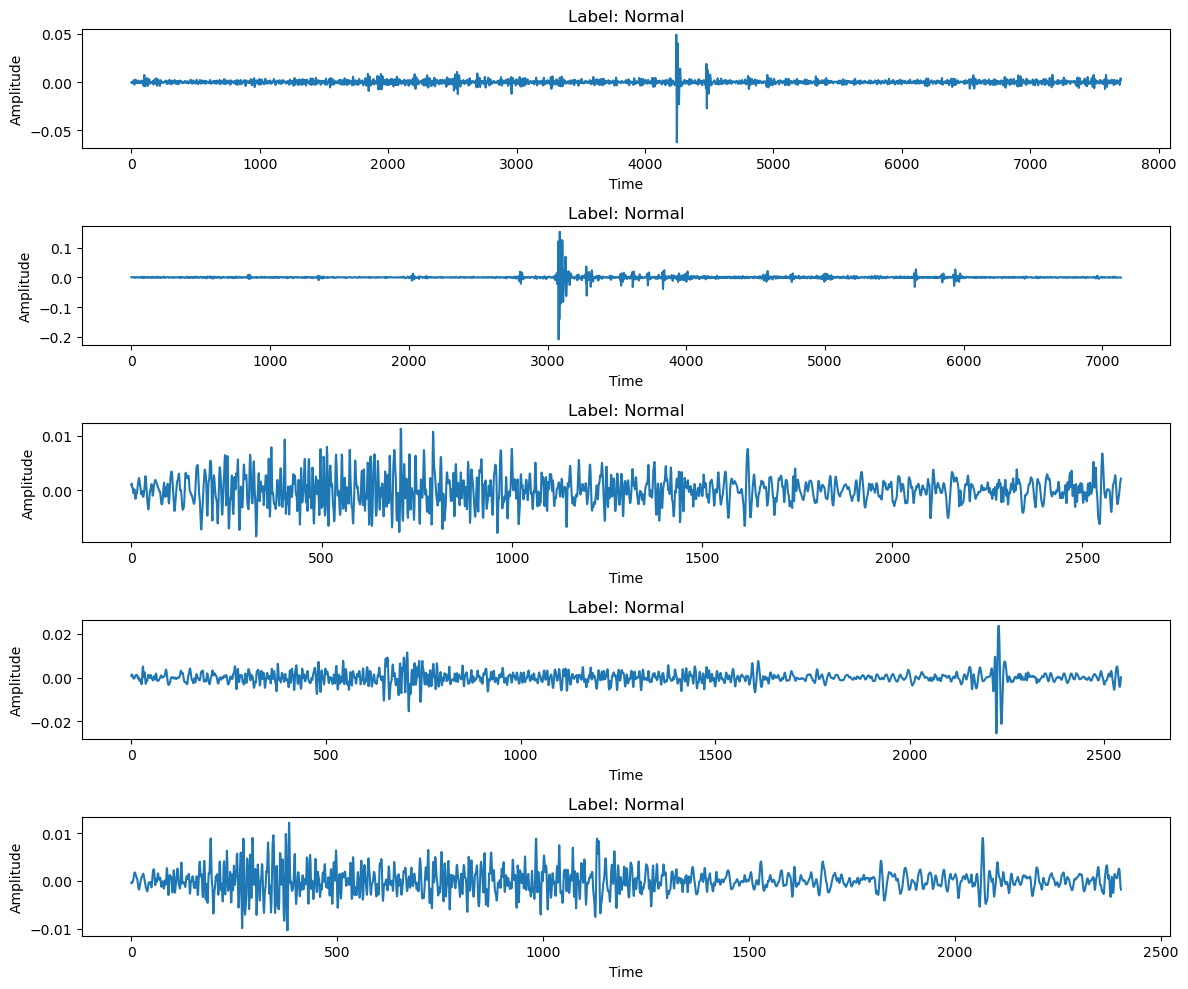

In [130]:
import matplotlib.pyplot as plt

# Filter indices for "Normal"
Normal_indices = [i for i, label in enumerate(y) if label == "Normal"]

# Number of signals to plot (limit if too many)
num_plots = min(5, len(Normal_indices))

plt.figure(figsize=(12, num_plots * 2))

for i in range(num_plots):
    idx = Normal_indices[i]
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(X[idx])
    plt.title(f"Label: {y[idx]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


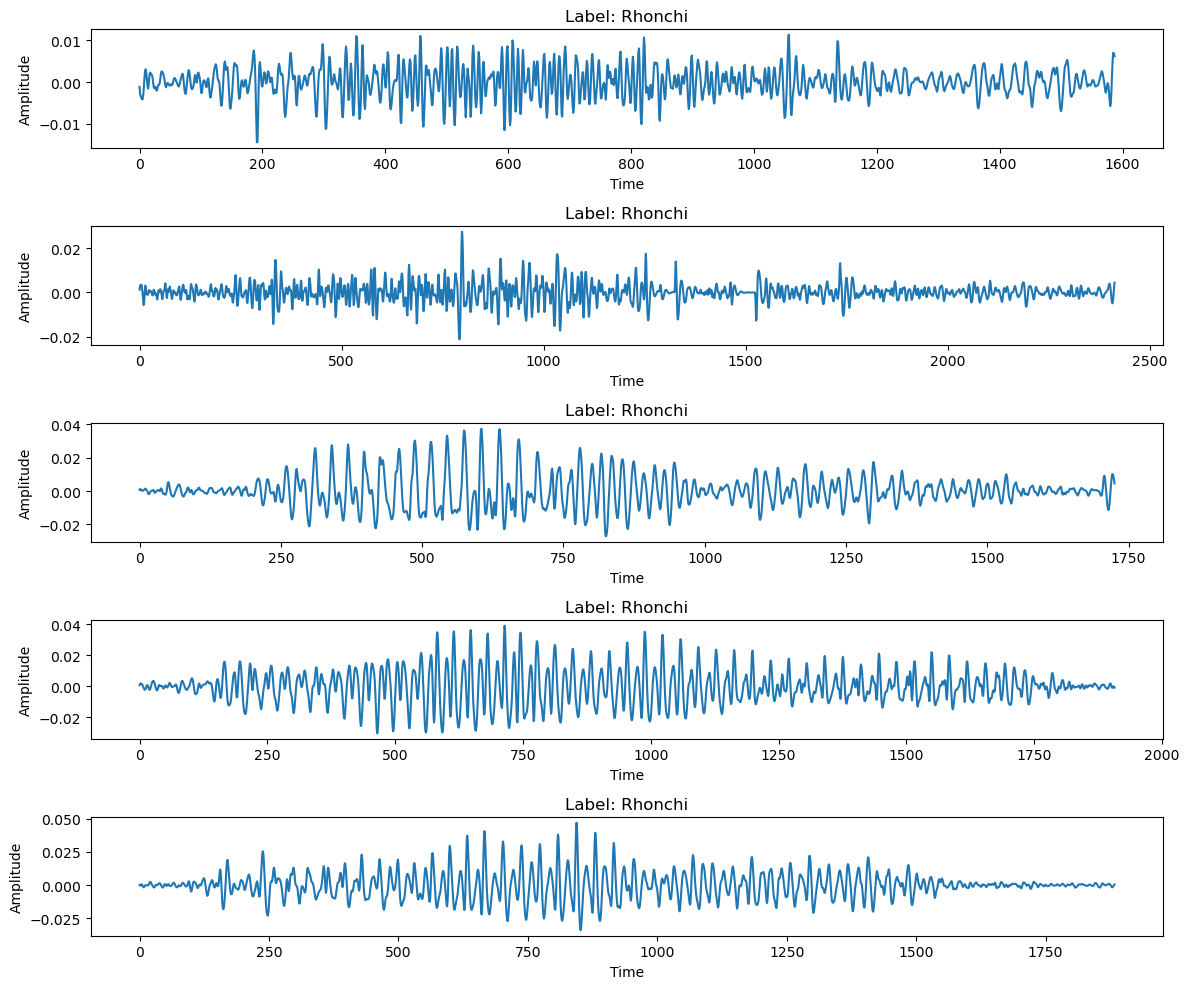

In [132]:
import matplotlib.pyplot as plt

# Filter indices for "Rhonchi"
Rhonchi_indices = [i for i, label in enumerate(y) if label == "Rhonchi"]

# Number of signals to plot (limit if too many)
num_plots = min(5, len(Rhonchi_indices))

plt.figure(figsize=(12, num_plots * 2))

for i in range(num_plots):
    idx = Rhonchi_indices[i]
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(X[idx])
    plt.title(f"Label: {y[idx]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


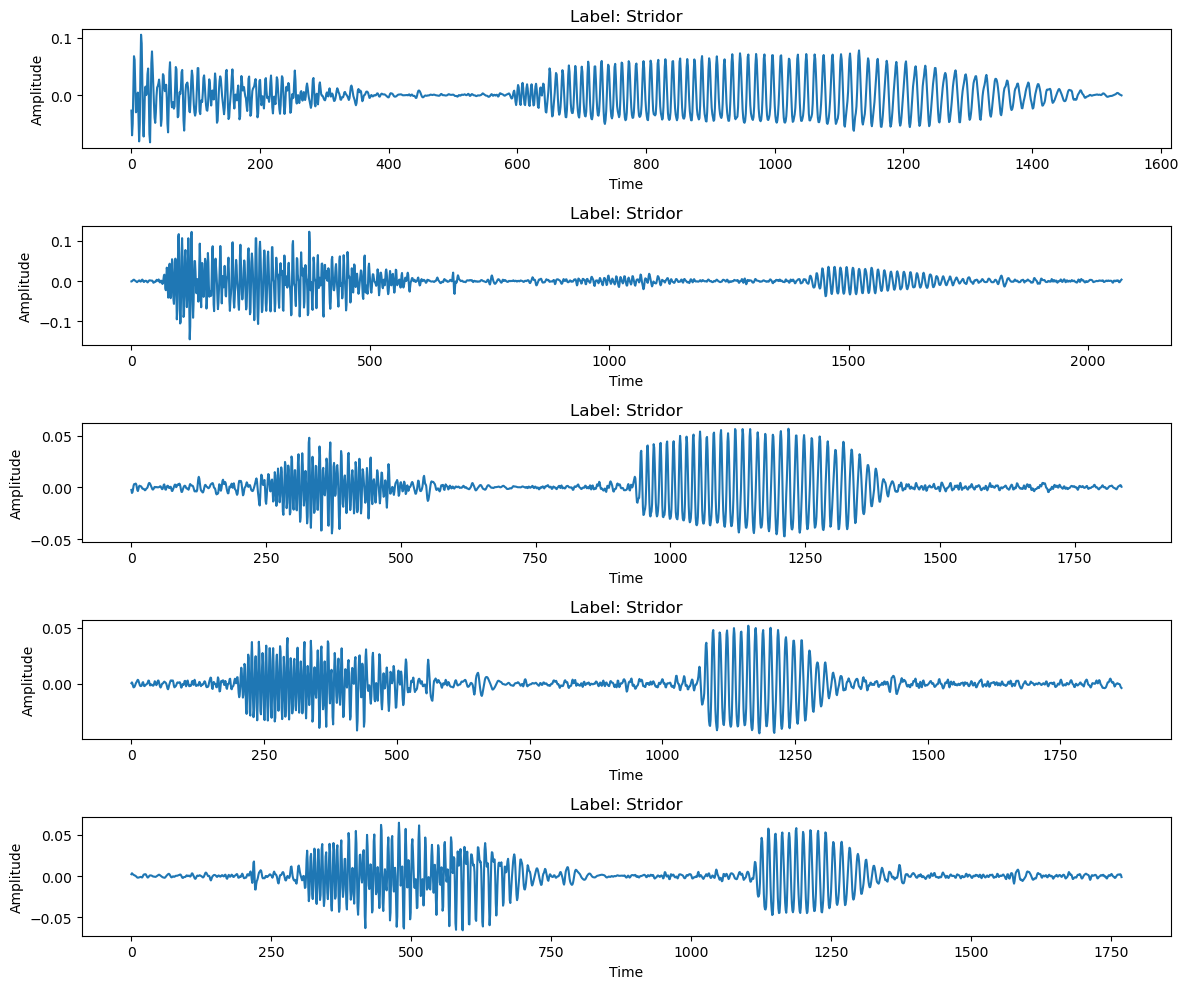

In [134]:
import matplotlib.pyplot as plt

# Filter indices for "Stridor"
Stridor_indices = [i for i, label in enumerate(y) if label == "Stridor"]

# Number of signals to plot (limit if too many)
num_plots = min(5, len(Stridor_indices))

plt.figure(figsize=(12, num_plots * 2))

for i in range(num_plots):
    idx = Stridor_indices[i]
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(X[idx])
    plt.title(f"Label: {y[idx]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

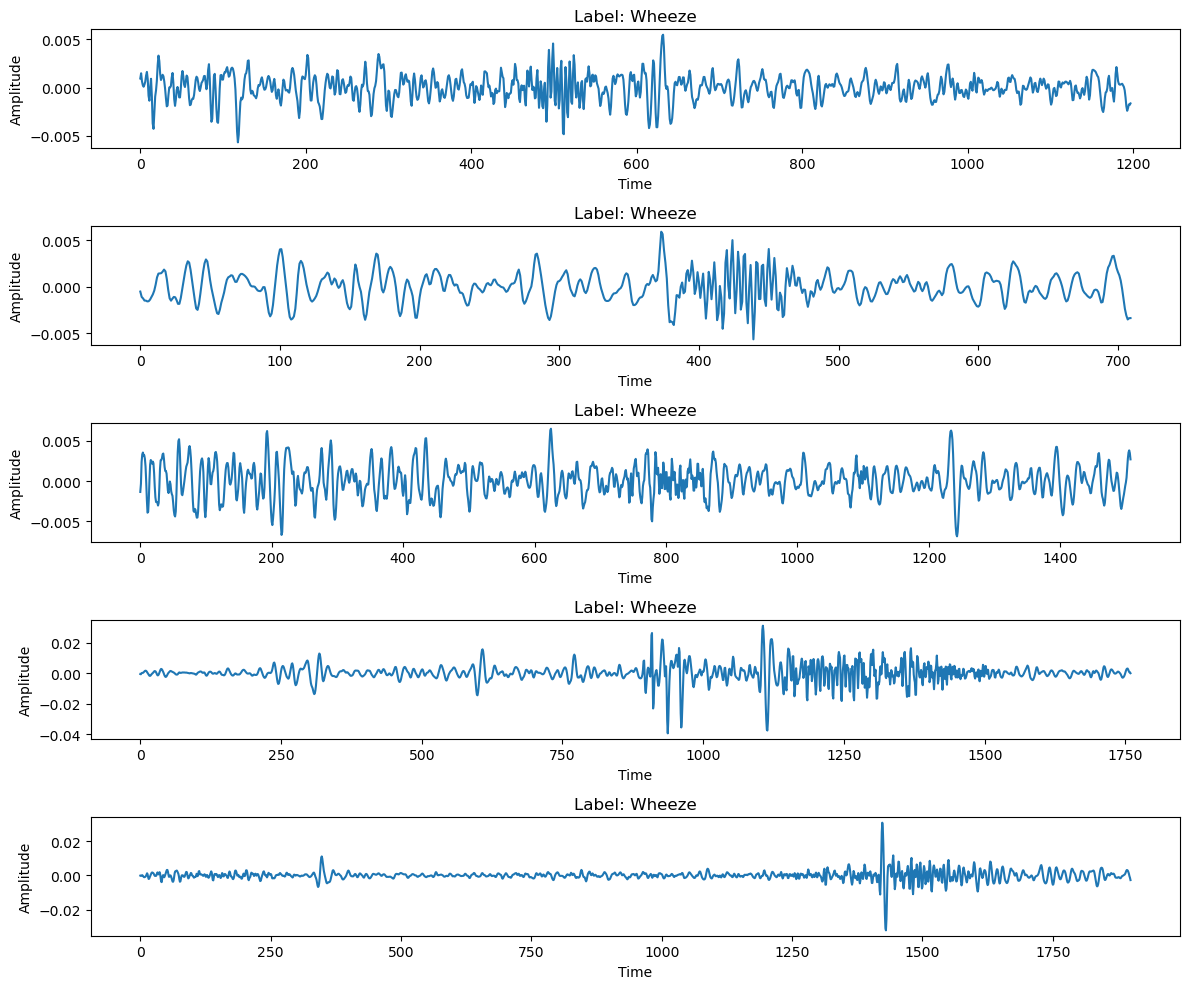

In [136]:
import matplotlib.pyplot as plt

# Filter indices for "Wheeze"
Wheeze_indices = [i for i, label in enumerate(y) if label == "Wheeze"]

# Number of signals to plot (limit if too many)
num_plots = min(5, len(Wheeze_indices))

plt.figure(figsize=(12, num_plots * 2))

for i in range(num_plots):
    idx = Wheeze_indices[i]
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(X[idx])
    plt.title(f"Label: {y[idx]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()

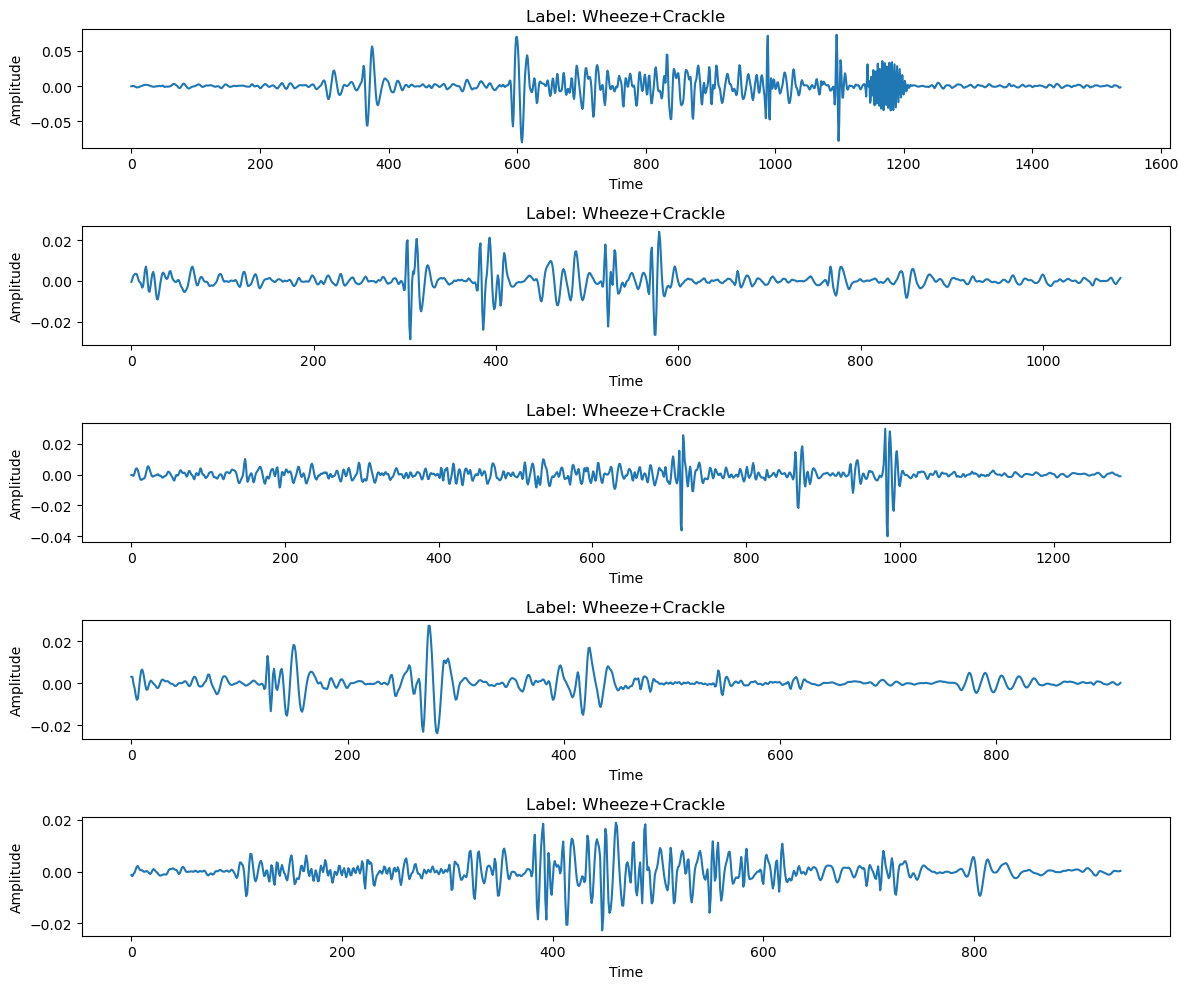

In [138]:
import matplotlib.pyplot as plt

# ✅ Use a valid variable name (no '+')
wheeze_crackle_indices = [i for i, label in enumerate(y) if label == "Wheeze+Crackle"]

# Number of signals to plot (limit if too many)
num_plots = min(5, len(wheeze_crackle_indices))

plt.figure(figsize=(12, num_plots * 2))

for i in range(num_plots):
    idx = wheeze_crackle_indices[i]
    plt.subplot(num_plots, 1, i + 1)
    plt.plot(X[idx])
    plt.title(f"Label: {y[idx]}")
    plt.xlabel("Time")
    plt.ylabel("Amplitude")

plt.tight_layout()
plt.show()


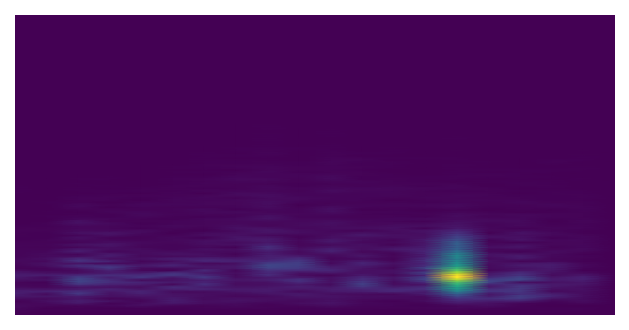

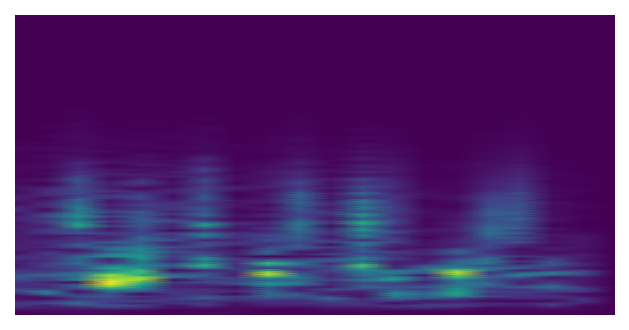

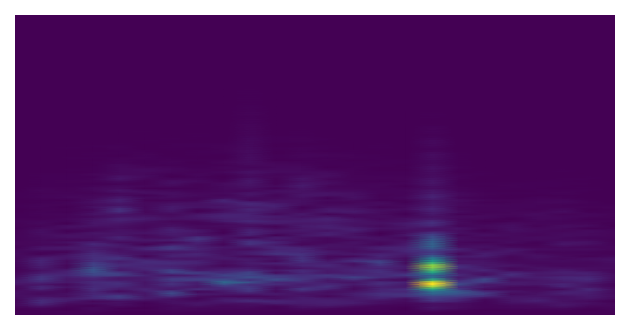

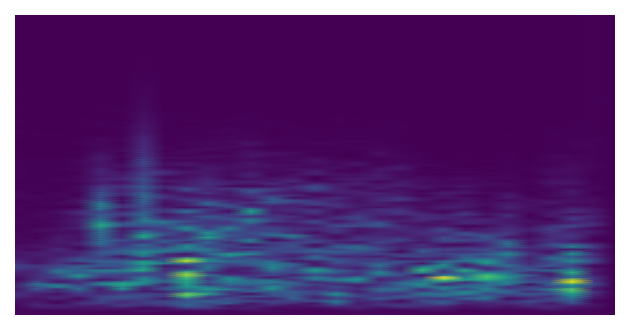

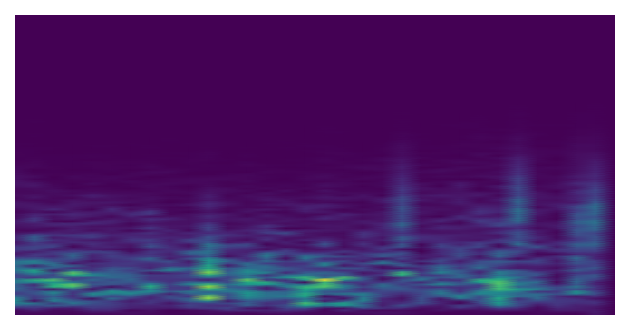

In [140]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # Number of spectrograms to process

# Output folder for saved spectrogram images
output_dir = "clean_spectrograms/Fine_Crackle"
os.makedirs(output_dir, exist_ok=True)

# ✅ Filter only Fine Crackle samples
fine_crackle_indices = [i for i, label in enumerate(y) if label == "Fine Crackle"]

# Limit to available samples
num_plots = min(num_plots, len(fine_crackle_indices))

for i in range(num_plots):
    idx = fine_crackle_indices[i]
    f, t, Zxx = stft(X[idx], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Create a clean figure
    fig = plt.figure(figsize=(4, 2), dpi=150)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Plot spectrogram
    ax.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')

    # Save and show
    filename = f"{output_dir}/finecrackle_{i}.png"
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show(fig)
    plt.close(fig)


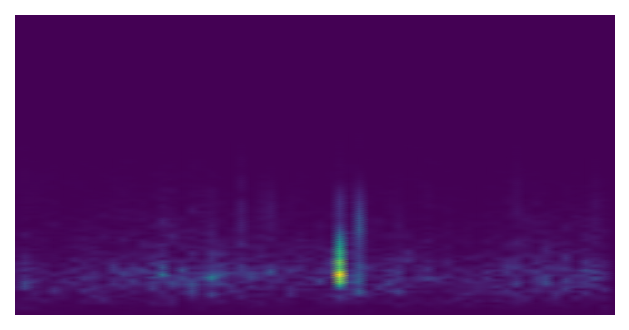

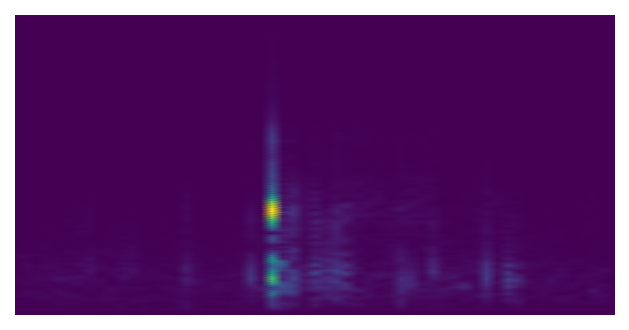

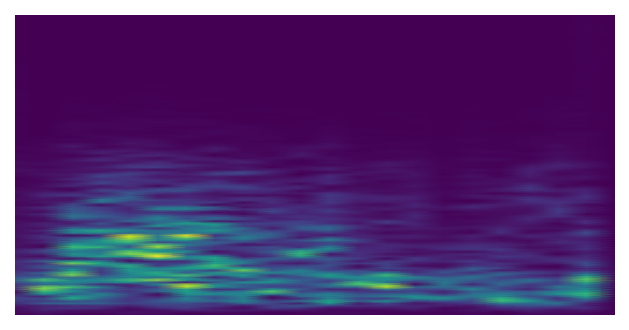

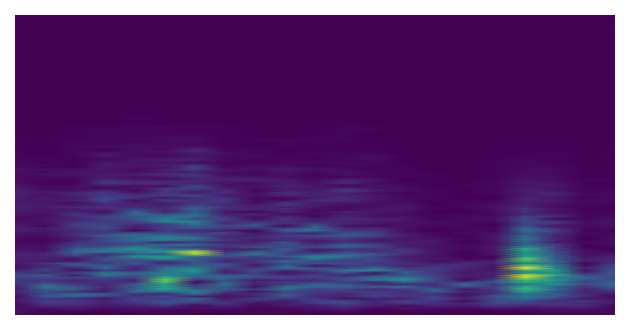

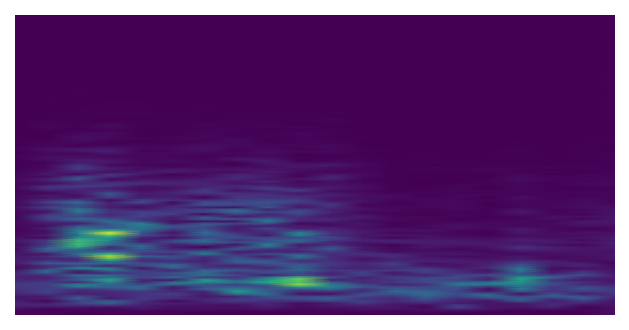

In [142]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # Number of spectrograms to process

# Output folder for saved spectrogram images
output_dir = "clean_spectrograms/Normal"
os.makedirs(output_dir, exist_ok=True)

# ✅ Filter only Fine Crackle samples
Normal_indices = [i for i, label in enumerate(y) if label == "Normal"]

# Limit to available samples
num_plots = min(num_plots, len(Normal_indices))

for i in range(num_plots):
    idx = Normal_indices[i]
    f, t, Zxx = stft(X[idx], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Create a clean figure
    fig = plt.figure(figsize=(4, 2), dpi=150)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Plot spectrogram
    ax.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')

    # Save and show
    filename = f"{output_dir}/Normal_{i}.png"
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show(fig)
    plt.close(fig)


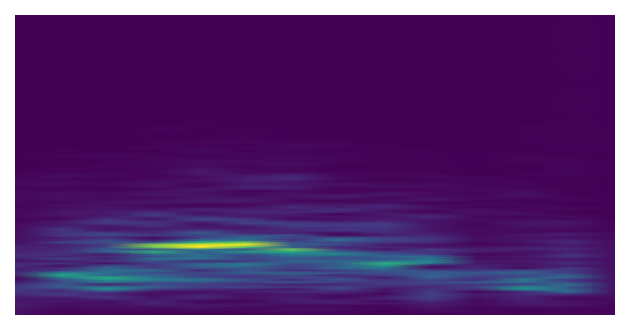

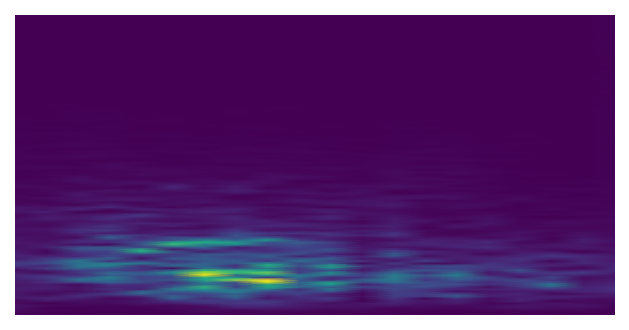

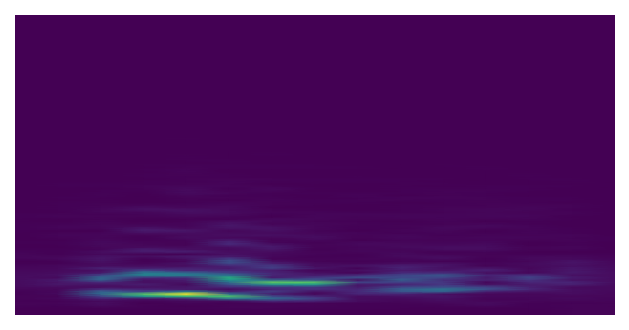

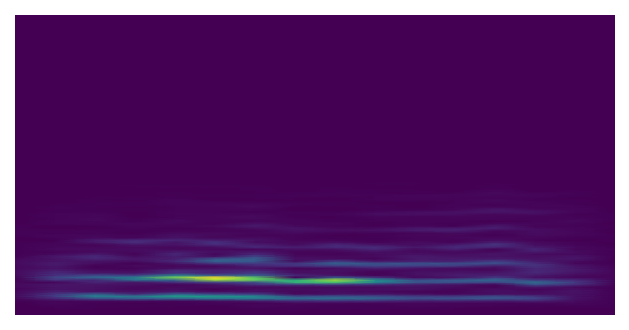

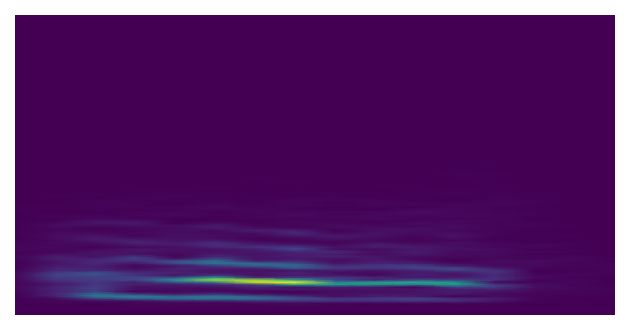

In [144]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # Number of spectrograms to process

# Output folder for saved spectrogram images
output_dir = "clean_spectrograms/Rhonchi"
os.makedirs(output_dir, exist_ok=True)

# ✅ Filter only Rhonchi samples
Rhonchi_indices = [i for i, label in enumerate(y) if label == "Rhonchi"]

# Limit to available samples
num_plots = min(num_plots, len(Rhonchi_indices))

for i in range(num_plots):
    idx = Rhonchi_indices[i]
    f, t, Zxx = stft(X[idx], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Create a clean figure
    fig = plt.figure(figsize=(4, 2), dpi=150)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Plot spectrogram
    ax.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')

    # Save and show
    filename = f"{output_dir}/Rhonchi_{i}.png"
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show(fig)
    plt.close(fig)


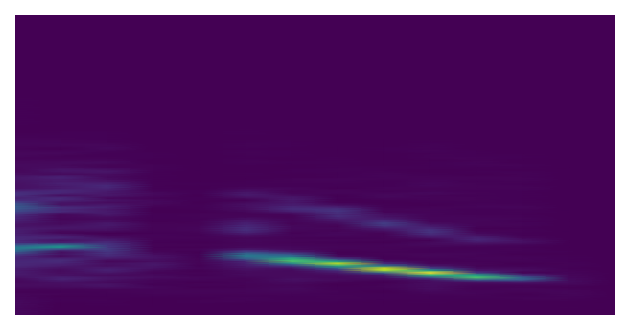

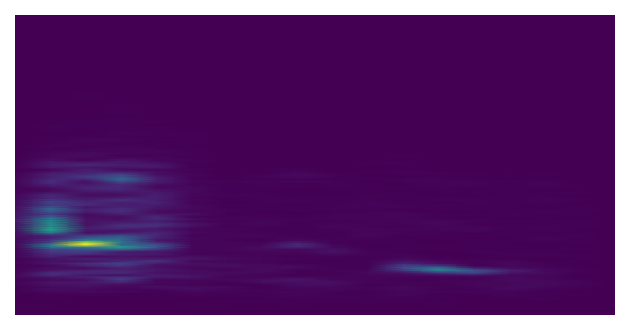

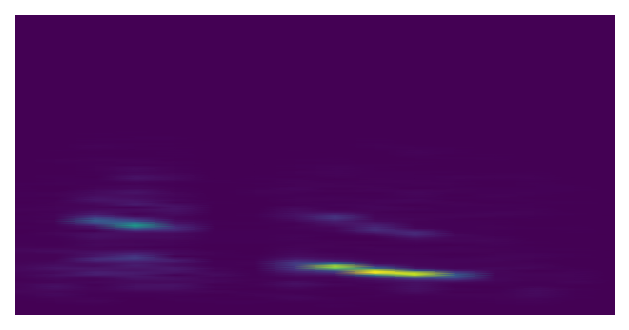

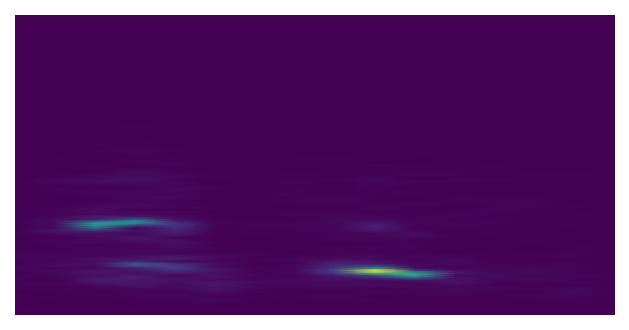

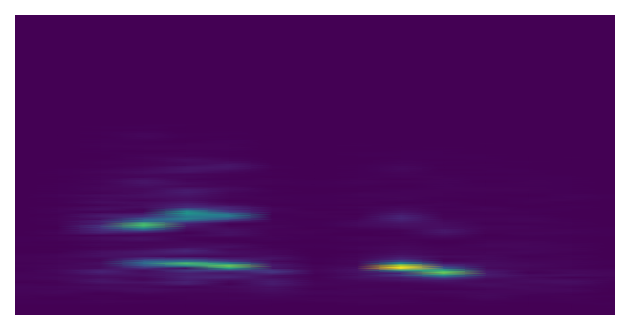

In [146]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # Number of spectrograms to process

# Output folder for saved spectrogram images
output_dir = "clean_spectrograms/Stridor"
os.makedirs(output_dir, exist_ok=True)

# ✅ Filter only Stridor samples
Stridor_indices = [i for i, label in enumerate(y) if label == "Stridor"]

# Limit to available samples
num_plots = min(num_plots, len(Stridor_indices))

for i in range(num_plots):
    idx = Stridor_indices[i]
    f, t, Zxx = stft(X[idx], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Create a clean figure
    fig = plt.figure(figsize=(4, 2), dpi=150)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Plot spectrogram
    ax.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')

    # Save and show
    filename = f"{output_dir}/Stridor_{i}.png"
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show(fig)
    plt.close(fig)


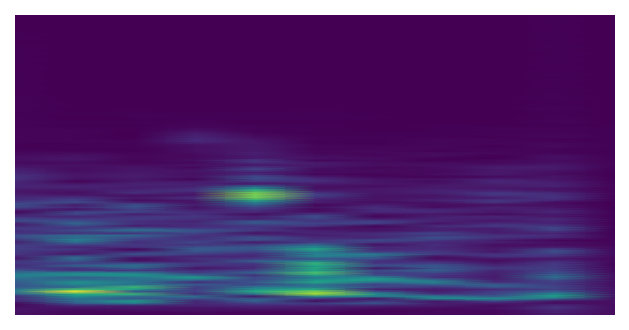

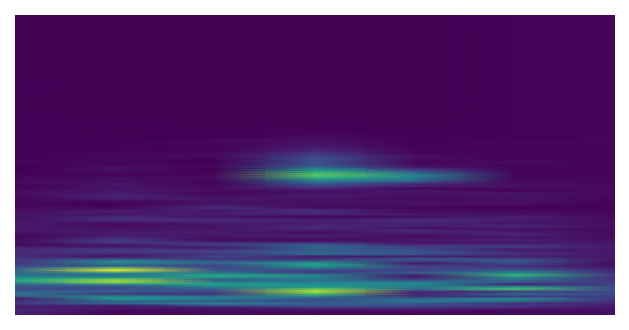

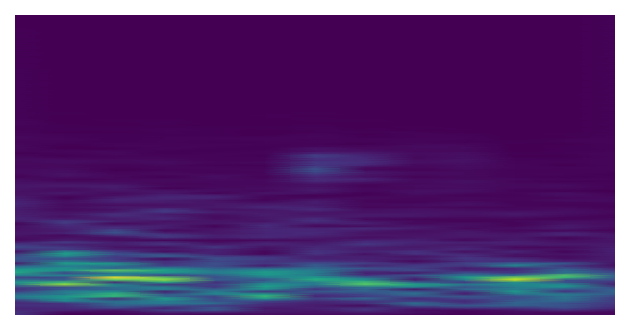

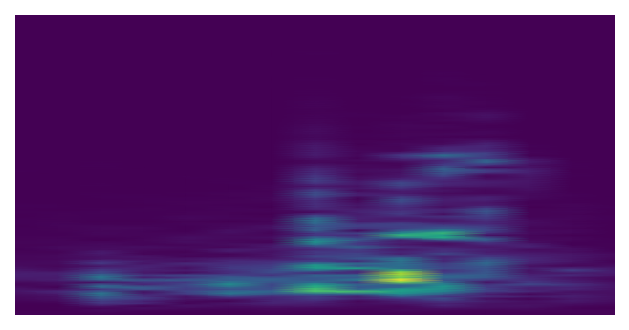

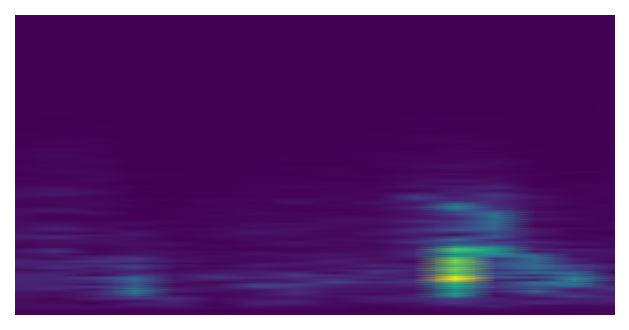

In [148]:
#Wheeze
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # Number of spectrograms to process

# Output folder for saved spectrogram images
output_dir = "clean_spectrograms/Wheeze"
os.makedirs(output_dir, exist_ok=True)

# ✅ Filter only Stridor samples
Wheeze_indices = [i for i, label in enumerate(y) if label == "Wheeze"]

# Limit to available samples
num_plots = min(num_plots, len(Wheeze_indices))

for i in range(num_plots):
    idx = Wheeze_indices[i]
    f, t, Zxx = stft(X[idx], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Create a clean figure
    fig = plt.figure(figsize=(4, 2), dpi=150)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Plot spectrogram
    ax.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')

    # Save and show
    filename = f"{output_dir}/Wheeze_{i}.png"
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show(fig)
    plt.close(fig)


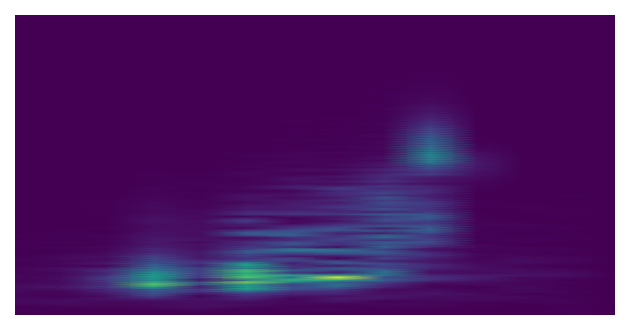

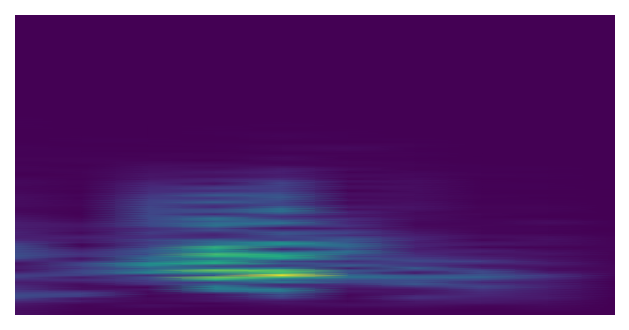

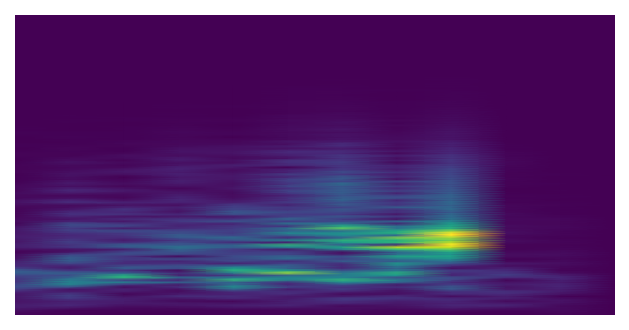

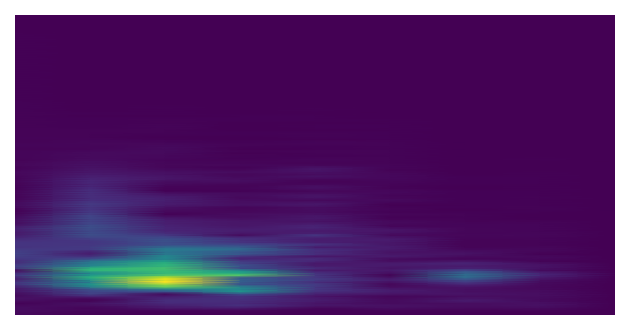

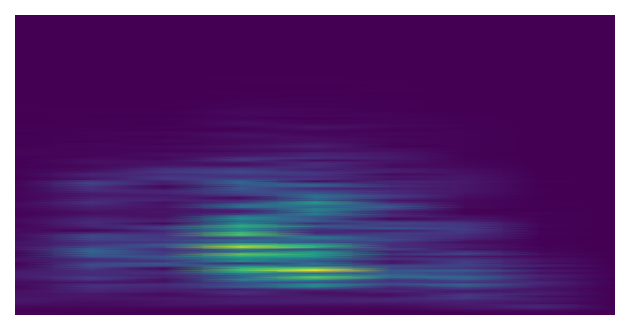

In [152]:
import matplotlib.pyplot as plt
from scipy.signal import stft
import numpy as np
import os

# Parameters
fs = 2000      # Sampling frequency
nperseg = 256  # Length of each STFT segment
num_plots = 5  # Number of spectrograms to process

# Output folder for saved spectrogram images
output_dir = "clean_spectrograms/Wheeze+Crackle"
os.makedirs(output_dir, exist_ok=True)

# ✅ Filter only Wheeze+Crackle samples
wheeze_crackle_indices = [i for i, label in enumerate(y) if label == "Wheeze+Crackle"]

# Limit to available samples
num_plots = min(num_plots, len(wheeze_crackle_indices))

for i in range(num_plots):
    idx = wheeze_crackle_indices[i]
    f, t, Zxx = stft(X[idx], fs=fs, nperseg=nperseg)
    magnitude = np.abs(Zxx)

    # Create a clean figure
    fig = plt.figure(figsize=(4, 2), dpi=150)
    ax = plt.Axes(fig, [0, 0, 1, 1])
    ax.set_axis_off()
    fig.add_axes(ax)

    # Plot spectrogram
    ax.pcolormesh(t, f, magnitude, shading='gouraud', cmap='viridis')

    # Save and show
    filename = f"{output_dir}/Wheeze+Crackle_{i}.png"
    fig.savefig(filename, bbox_inches='tight', pad_inches=0)
    plt.show(fig)
    plt.close(fig)


In [58]:
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from sklearn.metrics import classification_report, confusion_matrix


In [158]:
data_path = "clean_spectrograms"

In [160]:
img_height, img_width = 224, 224
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_data = datagen.flow_from_directory(
    data_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)


Found 28 images belonging to 7 classes.
Found 7 images belonging to 7 classes.


In [162]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_data.num_classes, activation='softmax')  # Output layer
])


C:\Users\asus\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [164]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [168]:
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20
)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.7143 - loss: 0.7356 - val_accuracy: 0.2857 - val_loss: 3.2162
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.6429 - loss: 0.7985 - val_accuracy: 0.2857 - val_loss: 2.6065
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9643 - loss: 0.3597 - val_accuracy: 0.1429 - val_loss: 2.2267
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9286 - loss: 0.2843 - val_accuracy: 0.1429 - val_loss: 2.0007
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9286 - loss: 0.2726 - val_accuracy: 0.1429 - val_loss: 1.9832
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.8571 - loss: 0.4517 - val_accuracy: 0.2857 - val_loss: 2.3429
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9286 - loss: 0.2506 - val_accuracy: 0.2857 - val_loss: 2.8160
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.9643 - loss: 0.2064 - val_accuracy: 0.2857 - val_loss: 3.0849
Epoch 9/20
1/1 ━

In [170]:
model.save("lung_sound_classifier.h5")

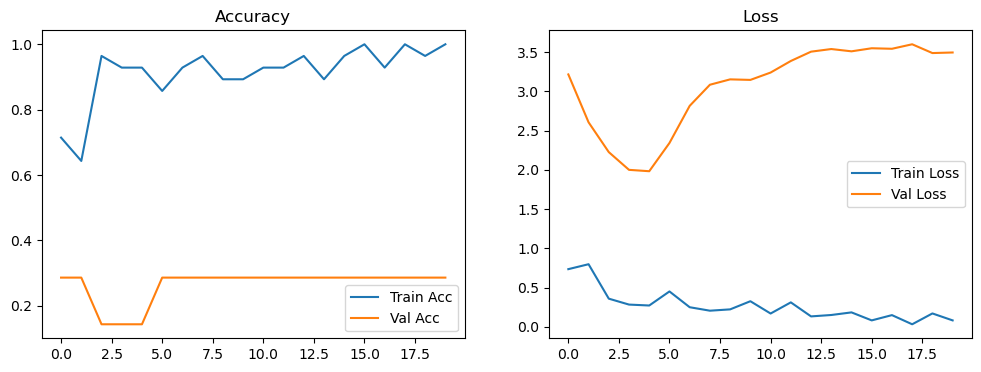

In [172]:
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label="Train Acc")
plt.plot(history.history['val_accuracy'], label="Val Acc")
plt.title("Accuracy")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label="Train Loss")
plt.plot(history.history['val_loss'], label="Val Loss")
plt.title("Loss")
plt.legend()

plt.show()

In [180]:
val_data.reset()
predictions = model.predict(val_data)
y_pred = np.argmax(predictions, axis=1)
y_true = val_data.classes

print("Classification Report:\n")
print(classification_report(y_true, y_pred, target_names=list(val_data.class_indices.keys())))

print("Confusion Matrix:\n")
print(confusion_matrix(y_true, y_pred))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 204ms/step
Classification Report:

                precision    recall  f1-score   support

Coarse Crackle       0.00      0.00      0.00         1
  Fine_Crackle       0.00      0.00      0.00         1
        Normal       0.00      0.00      0.00         1
       Rhonchi       1.00      1.00      1.00         1
       Stridor       0.50      1.00      0.67         1
        Wheeze       0.00      0.00      0.00         1
Wheeze+Crackle       0.50      1.00      0.67         1

      accuracy                           0.43         7
     macro avg       0.29      0.43      0.33         7
  weighted avg       0.29      0.43      0.33         7

Confusion Matrix:

[[0 0 1 0 0 0 0]
 [0 0 0 0 1 0 0]
 [0 0 0 0 0 0 1]
 [0 0 0 1 0 0 0]
 [0 0 0 0 1 0 0]
 [0 1 0 0 0 0 0]
 [0 0 0 0 0 0 1]]


C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\asus\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [182]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

In [202]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# === Step 1: Define input/output folders ===
folder_path = r"Desktop\Respiratory dataset\Spr_dataset\output_events\Coarse Crackle"
output_folder = os.path.join(folder_path, "Clean_STFT_Plots")
os.makedirs(output_folder, exist_ok=True)

# === Step 2: List .wav files ===
wav_files = [f for f in os.listdir(folder_path) if f.endswith(".wav")]

# === Step 3: Process and save clean STFT plots ===
for file_name in wav_files:
    file_path = os.path.join(folder_path, file_name)

    try:
        # Load audio
        x, sr = librosa.load(file_path, sr=None)

        # Skip empty/short signals
        if len(x) < 10:
            print(f"Skipping: {file_name} (too short)")
            continue

        # Compute STFT and convert to dB
        stft = librosa.stft(x)
        stft_db = librosa.amplitude_to_db(abs(stft))

        # Plot without extras
        plt.figure(figsize=(4, 3))  # small size
        ax = plt.axes()
        ax.set_axis_off()  # remove all axis

        librosa.display.specshow(stft_db, sr=sr, cmap='magma', x_axis=None, y_axis=None)

        # Save without frame, axis, or padding
        save_path = os.path.join(output_folder, f"{os.path.splitext(file_name)[0]}.png")
        plt.savefig(save_path, bbox_inches='tight', pad_inches=0)
        plt.close()

        print(f"Saved clean spectrogram: {file_name}")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")


In [207]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# === Step 1: Define folder path ===
folder_path = "output_events\Coarse Crackle"
output_plot_folder = os.path.join(folder_path, "STFT_Plots")
os.makedirs(output_plot_folder, exist_ok=True)

# === Step 2: Get all .wav files ===
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# === Step 3: Process each file ===
for file_name in wav_files:
    file_path = os.path.join(folder_path, file_name)
    
    try:
        # Load audio file
        x, sr = librosa.load(file_path, sr=None)

        # Skip silent or very short files
        if len(x) < 10:
            print(f"Skipping empty: {file_name}")
            continue

        # Compute STFT and convert to dB scale
        stft_result = librosa.stft(x)
        stft_db = librosa.amplitude_to_db(abs(stft_result))

        # Plot STFT without any extras
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')  # Hide axes and ticks
        librosa.display.specshow(stft_db, sr=sr, cmap='magma', ax=ax)

        # Save figure as clean PNG
        output_file = os.path.join(output_plot_folder, f"{os.path.splitext(file_name)[0]}.png")
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()

        print(f"Saved: {output_file}")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")


<>:7: SyntaxWarning: invalid escape sequence '\C'
<>:7: SyntaxWarning: invalid escape sequence '\C'
C:\Users\asus\AppData\Local\Temp\ipykernel_8388\582417069.py:7: SyntaxWarning: invalid escape sequence '\C'
  folder_path = "output_events\Coarse Crackle"


Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_40797382_4.8_0_p3_3441_5.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41004529_5.2_1_p1_1408_5.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41161556_1.7_0_p2_3099_5.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41161556_1.7_0_p3_2154_5.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41190734_9.5_0_p1_1217_2.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41251473_2.7_1_p1_2156_1.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41251473_2.7_1_p1_2156_2.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41251473_2.7_1_p1_2156_3.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41251473_2.7_1_p2_2126_5.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41263355_3.4_0_p3_975_1.png
Saved: output_events\Coarse Crackle\STFT_Plots\Coarse Crackle_41271028_3.4_1_p4_1714_6.png


In [209]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# === Step 1: Define folder path for Fine Crackle ===
folder_path = "output_events\Fine Crackle"
output_plot_folder = os.path.join(folder_path, "STFT_Plots")
os.makedirs(output_plot_folder, exist_ok=True)

# === Step 2: Get all .wav files ===
wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

# === Step 3: Process each file ===
for file_name in wav_files:
    file_path = os.path.join(folder_path, file_name)
    
    try:
        # Load audio file
        x, sr = librosa.load(file_path, sr=None)

        # Skip silent or very short files
        if len(x) < 10:
            print(f"Skipping empty: {file_name}")
            continue

        # Compute STFT and convert to dB scale
        stft_result = librosa.stft(x)
        stft_db = librosa.amplitude_to_db(abs(stft_result))

        # Plot STFT without any extras
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')  # Hide axes and ticks
        librosa.display.specshow(stft_db, sr=sr, cmap='magma', ax=ax)

        # Save figure as clean PNG
        output_file = os.path.join(output_plot_folder, f"{os.path.splitext(file_name)[0]}.png")
        plt.savefig(output_file, bbox_inches='tight', pad_inches=0)
        plt.close()

        print(f"Saved: {output_file}")

    except Exception as e:
        print(f"Error processing {file_name}: {e}")


<>:7: SyntaxWarning: invalid escape sequence '\F'
<>:7: SyntaxWarning: invalid escape sequence '\F'
C:\Users\asus\AppData\Local\Temp\ipykernel_8388\469230448.py:7: SyntaxWarning: invalid escape sequence '\F'
  folder_path = "output_events\Fine Crackle"


Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p1_1789_1.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1684_1.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1684_2.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1684_3.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1684_4.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1719_1.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1719_2.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1719_3.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1719_4.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1719_5.png
Saved: output_events\Fine Crackle\STFT_Plots\Fine Crackle_40638274_9.7_1_p2_1719_6.png
Saved: output_events\Fine Crackle\STFT_Plot

In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

folder_path = "output_events/Normal"
output_plot_folder = os.path.join(folder_path, "STFT_Plots")
os.makedirs(output_plot_folder, exist_ok=True)

wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

for file_name in wav_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        x, sr = librosa.load(file_path, sr=None)
        if len(x) < 10:
            continue
        stft_db = librosa.amplitude_to_db(abs(librosa.stft(x)))
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')
        librosa.display.specshow(stft_db, sr=sr, cmap='magma', ax=ax)
        plt.savefig(os.path.join(output_plot_folder, f"{os.path.splitext(file_name)[0]}.png"), bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error: {e}")
    

In [239]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

folder_path = "output_events/Wheeze+Crackle"
output_plot_folder = os.path.join(folder_path, "STFT_Plots")
os.makedirs(output_plot_folder, exist_ok=True)

wav_files = [f for f in os.listdir(folder_path) if f.endswith('.wav')]

for file_name in wav_files:
    file_path = os.path.join(folder_path, file_name)
    try:
        x, sr = librosa.load(file_path, sr=None)
        if len(x) < 10:
            continue
        stft_db = librosa.amplitude_to_db(abs(librosa.stft(x)))
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.axis('off')
        librosa.display.specshow(stft_db, sr=sr, cmap='magma', ax=ax)
        plt.savefig(os.path.join(output_plot_folder, f"{os.path.splitext(file_name)[0]}.png"), bbox_inches='tight', pad_inches=0)
        plt.close()
    except Exception as e:
        print(f"Error: {e}")